In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
df = pd.read_csv('modeling.csv', index_col='Unnamed: 0')

In [7]:
df.head()

,name,rating,review_date,reviewer,review_url,neighborhood,review,headline,area,afinn_score,af_avg_pol,af_min_pol,af_max_pol,af_std_pol,tokens,vocabulary,headline_sent,funny,awesome,bastard,funnier,fantastic,ecstatic,catastrophic,tortured,amazing,triumphant,exuberant,masterpiece,fun,heavenly,miracle,wow,fraud,godsend,rapturous,breathtaking,superb,winning,supreme,fabulous,prick,damned,brilliant,triumph,wonderful,terrific,terrifically,thrilled,rejoice,win,stunning,slut,wonderfully,torture,outstanding,hell,x0_Frank Bruni,x0_Pete Wells,x0_Sam Sifton,x0_Brooklyn,x0_Downtown,x0_Midtown,x0_Other,x0_Uptown
0,Hanon,★★,2019-05-21,Pete Wells,https://www.nytimes.com/2019/05/21/dining/hano...,Williamsburg,"Hanon, a new udon shop in Williamsburg, Brookl...","Udon, Innovated for Your Pleasure",Brooklyn,39.0,0.886364,-2.0,6.0,1.654414,"['hanon', 'udon', 'williamsburg', 'brooklyn', ...",416,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Del Posto,★★★,2019-05-14,Pete Wells,https://www.nytimes.com/2019/05/14/dining/del-...,Chelsea,"More than a year ago, I was on the verge of re...","In Del Posto’s New Era, Cuisine and Service Ar...",Midtown,53.0,0.716216,-6.0,8.0,2.016957,"['ago', 'verge', 'reviewing', 'del', 'posto', ...",606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018344,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,The Freakin Rican,★,2019-05-07,Pete Wells,https://www.nytimes.com/2019/05/07/dining/the-...,Astoria,It is true that the bacalaitos at the Freakin ...,Pasteles and Two Kinds of Fried Chicken at the...,Other,45.0,0.865385,-2.0,5.0,1.593603,"['true', 'bacalaitos', 'freakin', 'rican', 'as...",471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Wayan,★★,2019-04-23,Pete Wells,https://www.nytimes.com/2019/04/23/dining/waya...,NoLIta,If you ate at Spice Market before it closed tw...,Tapping a Family Connection to Indonesian Food,Downtown,36.0,0.750000,-4.0,5.0,1.854050,"['spice', 'market', 'closed', 'year', 'ago', '...",425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.02171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Niche,★,2019-04-16,Pete Wells,https://www.nytimes.com/2019/04/16/dining/nich...,Lower East Side,"In 2012 and 2013, when people were lining up a...",Ramen Without Broth? A Chef Doubles Down on a ...,Downtown,19.0,0.387755,-4.0,4.0,1.536180,"['people', 'lining', 'smorgasburg', 'houston',...",414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
def add_num_rating(rating):
    
    if rating == '0 star':
        return 0
    elif rating == '★':
        return 1
    elif rating == '★★':
        return 2
    else:
        return 3
    
df['num_rating'] = df['rating'].apply(lambda x: add_num_rating(x))

In [6]:
df.drop(['name','review_date','review_url','neighborhood','review','tokens','afinn_score','af_min_pol','af_max_pol','reviewer','headline','area','rating'], axis=1, inplace=True)

In [7]:
df.columns

Index(['af_avg_pol', 'af_std_pol', 'vocabulary', 'headline_sent', 'funny',
       'awesome', 'bastard', 'funnier', 'fantastic', 'ecstatic',
       'catastrophic', 'tortured', 'amazing', 'triumphant', 'exuberant',
       'masterpiece', 'fun', 'heavenly', 'miracle', 'wow', 'fraud', 'godsend',
       'rapturous', 'breathtaking', 'superb', 'winning', 'supreme', 'fabulous',
       'prick', 'damned', 'brilliant', 'triumph', 'wonderful', 'terrific',
       'terrifically', 'thrilled', 'rejoice', 'win', 'stunning', 'slut',
       'wonderfully', 'torture', 'outstanding', 'hell', 'x0_Frank Bruni',
       'x0_Pete Wells', 'x0_Sam Sifton', 'x0_Brooklyn', 'x0_Downtown',
       'x0_Midtown', 'x0_Other', 'x0_Uptown', 'num_rating'],
      dtype='object')

In [8]:
features = ['af_avg_pol', 'af_std_pol', 'vocabulary', 'headline_sent', 'funny',
       'awesome', 'bastard', 'funnier', 'fantastic', 'ecstatic',
       'catastrophic', 'tortured', 'amazing', 'triumphant', 'exuberant',
       'masterpiece', 'fun', 'heavenly', 'miracle', 'wow', 'fraud', 'godsend',
       'rapturous', 'breathtaking', 'superb', 'winning', 'supreme', 'fabulous',
       'prick', 'damned', 'brilliant', 'triumph', 'wonderful', 'terrific',
       'terrifically', 'thrilled', 'rejoice', 'win', 'stunning', 'slut',
       'wonderfully', 'torture', 'outstanding', 'hell', 'x0_Frank Bruni',
       'x0_Pete Wells', 'x0_Sam Sifton', 'x0_Brooklyn', 'x0_Downtown',
       'x0_Midtown', 'x0_Other', 'x0_Uptown']

Text(0.5, 1.0, 'Class Imbalance')

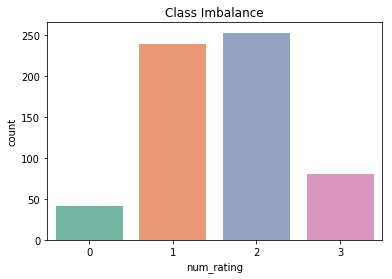

In [87]:
sns.countplot(df['num_rating'], palette='Set2')
plt.title('Class Imbalance')

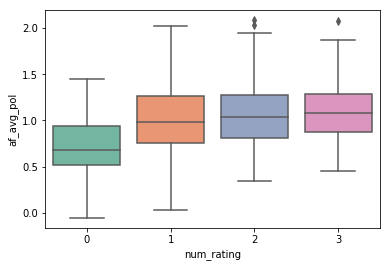

In [89]:
sns.boxplot(df['num_rating'], df['af_avg_pol'], palette = 'Set2')

In [90]:
df.columns

Index(['af_avg_pol', 'af_std_pol', 'vocabulary', 'headline_sent', 'funny',
       'awesome', 'bastard', 'funnier', 'fantastic', 'ecstatic',
       'catastrophic', 'tortured', 'amazing', 'triumphant', 'exuberant',
       'masterpiece', 'fun', 'heavenly', 'miracle', 'wow', 'fraud', 'godsend',
       'rapturous', 'breathtaking', 'superb', 'winning', 'supreme', 'fabulous',
       'prick', 'damned', 'brilliant', 'triumph', 'wonderful', 'terrific',
       'terrifically', 'thrilled', 'rejoice', 'win', 'stunning', 'slut',
       'wonderfully', 'torture', 'outstanding', 'hell', 'x0_Frank Bruni',
       'x0_Pete Wells', 'x0_Sam Sifton', 'x0_Brooklyn', 'x0_Downtown',
       'x0_Midtown', 'x0_Other', 'x0_Uptown', 'num_rating'],
      dtype='object')

# Models

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [12]:
X = df.drop('num_rating', axis=1)
y = df['num_rating']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mms = MinMaxScaler()

In [16]:
X_train = mms.fit_transform(X_train)

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
X_test = mms.transform(X_test)

## Upsampling

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(sampling_strategy='not majority', random_state=23, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [63]:
unique_elements, counts_elements = np.unique(y_train_sm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2   3]
 [201 201 201 201]]


## Logistic Classification

In [65]:
from sklearn.linear_model import LogisticRegression

### Without Upsampling

In [109]:
lr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=5,n_jobs=-1)

In [110]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=5, warm_start=False)

In [111]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [112]:
print('Accuracy test: ', accuracy_score(y_test, pred_test))

Accuracy test:  0.4715447154471545


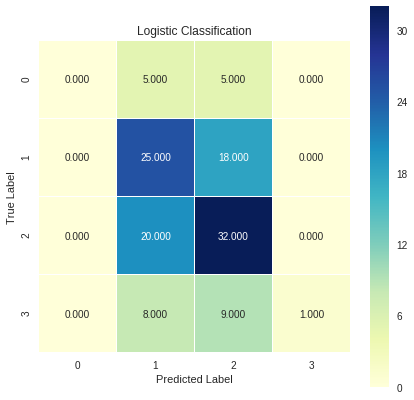

In [113]:
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Logistic Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [66]:
lrsm = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=5,n_jobs=-1)

In [67]:
lrsm.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=5, warm_start=False)

In [68]:
pred_train_sm = lrsm.predict(X_train)
pred_test_sm = lrsm.predict(X_test)

In [69]:
print('Accuracy test: ', accuracy_score(y_test, pred_test_sm))

Accuracy test:  0.3089430894308943


Text(42.0, 0.5, 'True Label')

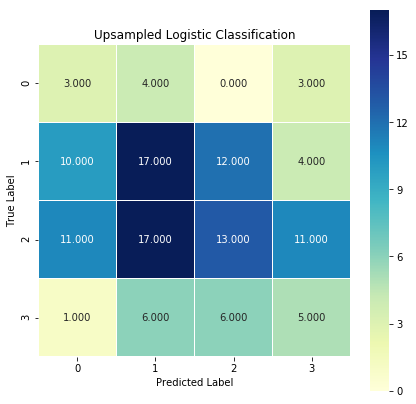

In [70]:
cm_lrsm = confusion_matrix(y_test, pred_test_sm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lrsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Logistic Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
nb = MultinomialNB()

In [73]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)

In [75]:
print('Accuracy test: ', accuracy_score(y_test, nb_pred_test))

Accuracy test:  0.4959349593495935


Text(42.0, 0.5, 'True Label')

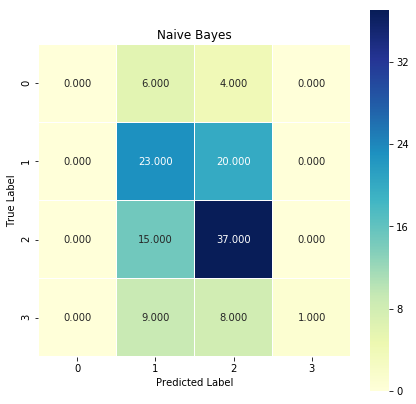

In [76]:
cm_nb = confusion_matrix(y_test, nb_pred_test)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [78]:
nbsm = MultinomialNB()

In [79]:
nbsm.fit(X_train_sm, y_train_sm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
nb_pred_train_sm = nbsm.predict(X_train)
nb_pred_test_sm = nbsm.predict(X_test)

In [83]:
print('Accuracy test: ', accuracy_score(y_test, nb_pred_test_sm))

Accuracy test:  0.2682926829268293


Text(42.0, 0.5, 'True Label')

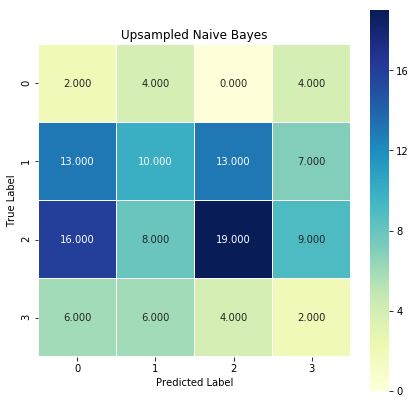

In [84]:
cm_nbsm = confusion_matrix(y_test, nb_pred_test_sm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_nbsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [116]:
rfc = RandomForestClassifier()

In [117]:
params_rfc = dict(n_estimators=[80,81,82,83,84,85],max_depth=[10,11,12,13,14],min_samples_leaf=[.007,.008,.009,.01])

In [118]:
gs_rfc = GridSearchCV(rfc, params_rfc, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [119]:
gs_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=80, score=0.46153846153846156, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=80, score=0.4117647058823529, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=80 ...........
[CV]  max_depth=10, mi

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s


[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=81, score=0.45098039215686275, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=82 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=81, score=0.42857142857142855, total=   0.2s
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=81, score=0.4489795918367347, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=83 ...........
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=81, score=0.3958333333333333, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=82, score=0.34, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_

[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=81 ...........
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_depth=10, min_samples_leaf=0.007, n_estimators=85, score=0.4583333333333333, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=80, score=0.42857142857142855, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=80, score=0.3333333333333333, total=   0.1s
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=80, score=0.4791666666666667, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=80, score=0.46938775510204084, total=   0.2s
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=81, score=

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.1s


[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=85, score=0.48, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=80 ...........
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=84, score=0.3958333333333333, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=85, score=0.4489795918367347, total=   0.2s
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=85, score=0.49019607843137253, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=85, score=0.3125, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=10, min_samples_leaf=0.008, n_estimators=85, score=0.3958333333333333, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.008, n_estimators=85 .....

[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=83, score=0.47058823529411764, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=83, score=0.3541666666666667, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=83, score=0.4791666666666667, total=   0.2s
[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=84, score=0.5, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=85 ...........
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=84, score=0.45098039215686275, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=10, min_samples_leaf=0.009, n_estimators=84, score=0.4489795918367347, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.009, n_estimat

[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=82, score=0.4489795918367347, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=83 ............
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=82, score=0.4166666666666667, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=82, score=0.3541666666666667, total=   0.2s
[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=83, score=0.4807692307692308, total=   0.1s
[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=83, score=0.48, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=83 ............
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=83 ............
[CV] max_depth=10, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=10, min_samples_leaf=0.01, n_estimators=83, score=0.40816326530612246, t

[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=81, score=0.3673469387755102, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=83 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=81, score=0.4791666666666667, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=81, score=0.42857142857142855, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=83 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=82, score=0.44, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=82, score=0.46153846153846156, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=82, score=0.458333333333

[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.9s


[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=85, score=0.44, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=84, score=0.375, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=85, score=0.3958333333333333, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=85, score=0.5102040816326531, total=   0.2s
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=85, score=0.5, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=85 ...........
[CV] max_depth=11, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=11, min_samples_leaf=0.007, n_estimators=85, score=0.45098039215686275, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max

[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=84, score=0.5, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=83, score=0.4166666666666667, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=84, score=0.42, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=84, score=0.4489795918367347, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=84, score=0.3333333333333333, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.008, n_estimators=85, score=0.44, total=   0.1s
[CV]  max_d

[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=82, score=0.4375, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=82 ...........
[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=82, score=0.42857142857142855, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=83, score=0.40816326530612246, total=   0.1s
[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=83, score=0.44, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=83 ...........
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=83 ...........
[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=82, score=0.4791666666666667, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=11, min_samples_leaf=0.009, n_estimators=83, score=0.4583333333333333, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.009, n_estimators=83 ....

[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=11, min_samples_leaf=0.01, n_estimators=81, score=0.40816326530612246, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=82 ............
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=11, min_samples_leaf=0.01, n_estimators=82, score=0.40816326530612246, total=   0.1s
[CV]  max_depth=11, min_samples_leaf=0.01, n_estimators=82, score=0.44, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=82 ............
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=11, min_samples_leaf=0.01, n_estimators=81, score=0.4791666666666667, total=   0.1s
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=83 ............
[CV]  max_depth=11, min_samples_leaf=0.01, n_estimators=81, score=0.4489795918367347, total=   0.2s
[CV] max_depth=11, min_samples_leaf=0.01, n_estimators=83 ............
[CV]  max_depth

[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=80, score=0.47058823529411764, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=81, score=0.5, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=80, score=0.3877551020408163, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=80, score=0.4583333333333333, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=81, score=0.5, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=80, score=0.40816326530612246, total=   0

[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=85, score=0.43137254901960786, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=85, score=0.4791666666666667, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=85, score=0.42857142857142855, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.007, n_estimators=85 ...........
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=80, score=0.46153846153846156, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.007, n_estimators=85, score=0.4375, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  m

[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   11.2s


[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=80, score=0.45098039215686275, total=   0.1s
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=81, score=0.4807692307692308, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=80, score=0.42857142857142855, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=80, score=0.4489795918367347, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=82 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=81, score=0.5, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_d

[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=85, score=0.375, total=   0.2s
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=80, score=0.4230769230769231, total=   0.1s
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=85, score=0.4166666666666667, total=   0.2s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=85, score=0.4117647058823529, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=80 ...........
[CV] max_depth=12, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=80, score=0.4, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=12, min_samples_leaf=0.008, n_estimators=85, score=0.3877551020408163, total=   0

[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=84, score=0.4166666666666667, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=84, score=0.45098039215686275, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=83, score=0.375, total=   0.2s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=85 ...........
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=84, score=0.42857142857142855, total=   0.1s
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=84, score=0.42857142857142855, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.009, n_estimators=85 ...........
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=80 ............
[CV]  max_depth=12, min_samples_leaf=0.009, n_estimators=84, score=0.4791666666

[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=82, score=0.3673469387755102, total=   0.2s
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=84 ............
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=83, score=0.3333333333333333, total=   0.1s
[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=82, score=0.3958333333333333, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=83 ............
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=83, score=0.47058823529411764, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.01, n_estimators=84 ............
[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=83, score=0.4489795918367347, total=   0.1s
[CV]  max_depth=12, min_samples_leaf=0.01, n_estimators=83, score=0.42857142857142855, total=   0.1s
[CV] max_depth=12, min_samples_leaf=0.01, n

[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=81, score=0.4583333333333333, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.007, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=81, score=0.46938775510204084, total=   0.2s
[CV] max_depth=13, min_samples_leaf=0.007, n_estimators=83 ...........
[CV] max_depth=13, min_samples_leaf=0.007, n_estimators=83 ...........
[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=82, score=0.43137254901960786, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.007, n_estimators=83 ...........
[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=81, score=0.4375, total=   0.2s
[CV] max_depth=13, min_samples_leaf=0.007, n_estimators=83 ...........
[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=82, score=0.4166666666666667, total=   0.2s
[CV]  max_depth=13, min_samples_leaf=0.007, n_estimators=82, score=0.3877551020408163, total=   0.2s
[CV] max_depth=13, min_samples_leaf=0.007, n_esti

[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=81, score=0.4, total=   0.2s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=81 ...........
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=81 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=80, score=0.42857142857142855, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=80, score=0.3541666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=80, score=0.4791666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=81, score=0.4117647058823529, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=81, score=0.44897959183673

[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=80, score=0.44, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.008, n_estimators=85 ...........
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=80 ...........
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=85, score=0.4791666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=81 ...........
[CV]  max_depth=13, min_samples_leaf=0.008, n_estimators=85, score=0.3673469387755102, total=   0.2s
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=80, score=0.4375, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=81 ...........
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=80, score=0.4489795918367347, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=80 ...........
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=80 ...........
[CV]  max_depth=13, min_

[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.9s


[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=82, score=0.37254901960784315, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=83 ...........
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=82, score=0.42857142857142855, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=83 ...........
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=82, score=0.42857142857142855, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=82, score=0.3958333333333333, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=82 ...........
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=82, score=0.4375, total=   0.1s
[CV]  max_depth=13, min_samples_leaf=0.009, n_estimators=83, score=0.4423076923076923, total=   0.2s
[CV] max_depth=13, min_samples_leaf=0.009, n_estimators=84 ...........
[CV] max_depth=13, min_samples_leaf=0.009, n_est

[CV] max_depth=13, min_samples_leaf=0.01, n_estimators=81 ............
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=80, score=0.3541666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=81, score=0.45098039215686275, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=81, score=0.4166666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.01, n_estimators=81 ............
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=82, score=0.46153846153846156, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=81, score=0.3877551020408163, total=   0.2s
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=81, score=0.4791666666666667, total=   0.1s
[CV] max_depth=13, min_samples_leaf=0.01, n

[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=81 ...........
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=80 ...........
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=80 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=80, score=0.47058823529411764, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=80, score=0.4375, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=80 ...........
[CV]  max_depth=13, min_samples_leaf=0.01, n_estimators=85, score=0.3958333333333333, total=   0.2s
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=80, score=0.3877551020408163, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=81 ...........
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=81 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=81, score=0.4230769230769231, total=   0.1s
[CV]  max_

[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=85, score=0.42857142857142855, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=84, score=0.4166666666666667, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=85, score=0.5, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.007, n_estimators=85, score=0.375, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.007, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=80, score=0.46153846153846156, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=80 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=80, score=0.48, total=   0.1s
[CV] max

[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=83, score=0.5, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=84 ...........
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=84, score=0.3958333333333333, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=84, score=0.40816326530612246, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=84 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=84, score=0.4375, total=   0.2s
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=83, score=0.4375, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=84 ...........
[CV] max_depth=14, min_samples_leaf=0.008, n_estimators=85 ...........
[CV]  max_depth=14, min_samples_leaf=0.008, n_estimators=85, score=0.4423076923076923, total=   0.2s
[CV] m

[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=82 ...........
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=83 ...........
[CV]  max_depth=14, min_samples_leaf=0.009, n_estimators=83, score=0.46938775510204084, total=   0.1s
[CV]  max_depth=14, min_samples_leaf=0.009, n_estimators=83, score=0.3541666666666667, total=   0.1s
[CV]  max_depth=14, min_samples_leaf=0.009, n_estimators=82, score=0.4583333333333333, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=84 ...........
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=83 ...........
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=83 ...........
[CV]  max_depth=14, min_samples_leaf=0.009, n_estimators=82, score=0.3673469387755102, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_depth=14, min_samples_leaf=0.009, n_estimators=82, score=0.375, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.009, n_estimators=84 ...........
[CV]  max_

[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=81, score=0.4791666666666667, total=   0.1s
[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=82, score=0.4, total=   0.1s
[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=81, score=0.40816326530612246, total=   0.1s
[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=81, score=0.4489795918367347, total=   0.1s
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=82 ............
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=83 ............
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=82 ............
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=83 ............
[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=82, score=0.4489795918367347, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=82 ............
[CV]  max_depth=14, min_samples_leaf=0.01, n_estimators=81, score=0.3958333333333333, total=   0.2s
[CV] max_depth=14, min_samples_leaf=0.01, n_estimators=83 .

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   25.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [80, 81, 82, 83, 84, 85], 'max_depth': [10, 11, 12, 13, 14], 'min_samples_leaf': [0.007, 0.008, 0.009, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=5)

In [120]:
gs_rfc.best_params_

{'max_depth': 12, 'min_samples_leaf': 0.008, 'n_estimators': 81}

In [121]:
pred_train_rfc = gs_rfc.best_estimator_.predict(X_train)
pred_test_rfc = gs_rfc.best_estimator_.predict(X_test)

In [122]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfc))

Accuracy train:  0.6951219512195121
Accuracy test:  0.4796747967479675


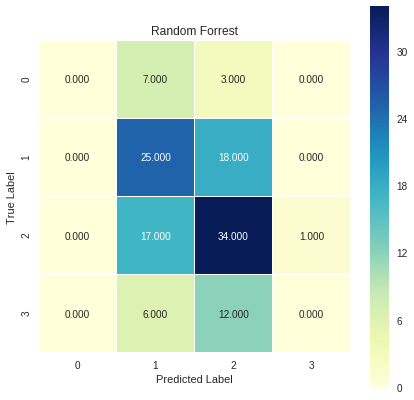

In [123]:
cm_rfc = confusion_matrix(y_test, pred_test_rfc)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## XGBoost

In [64]:
!pip install xgboost

    100% |████████████████████████████████| 142.8MB 6.4kB/s  eta 0:00:01 4% |█▎                              | 5.8MB 104.0MB/s eta 0:00:02
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
from xgboost import XGBClassifier

In [20]:
import xgboost as xg

In [21]:
data_dmatrix = xg.DMatrix(data=X_train,label=y_train)

/Users/samantha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [28]:
params = {"objective":"multi:softmax","num_class":4,'colsample_bytree': 0.3,'learning_rate': 0.005,
                'max_depth': 2, 'alpha': 10}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=500,early_stopping_rounds=5,
                   metrics="merror", as_pandas=True, seed=123,verbose_eval=5)
cv_results 

[0]	train-merror:0.574176+0.0111349	test-merror:0.613874+0.0315192
[5]	train-merror:0.533517+0.0208751	test-merror:0.589528+0.040537
[10]	train-merror:0.505589+0.0185077	test-merror:0.585405+0.0415594


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.574176,0.011135,0.613874,0.031519
1,0.550808,0.009908,0.589487,0.046210
2,0.548761,0.020158,0.597733,0.047330
3,0.543677,0.022632,0.599753,0.042352
4,0.537585,0.016285,0.591589,0.046363
5,0.533517,0.020875,0.589528,0.040537
6,0.526409,0.015307,0.583406,0.042011
7,0.526914,0.016360,0.587467,0.050435
8,0.521839,0.015181,0.583426,0.051996
9,0.512189,0.019884,0.581324,0.046452


In [32]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=100,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [33]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.44076358614190897)

In [35]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=100,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch2.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   10.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [36]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 2, 'min_child_weight': 6}, 0.4491338950852796)

In [37]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=100, subsample=0.8, 
                                    max_depth=2, min_child_weight=6, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    5.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [38]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.4491338950852796)

In [41]:
param_test4 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=100, subsample=0.8, 
                                    max_depth=2, min_child_weight=6, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch4.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   11.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.85, 0.9, 0.95], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [42]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.95}, 0.4591553222227335)

In [43]:
param_test5 = {
 'subsample':[i/100.0 for i in range(93,97)],
 'colsample_bytree':[i/100.0 for i in range(77,83)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=100, subsample=0.8, 
                                    max_depth=2, min_child_weight=6, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test5, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch5.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   34.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.93, 0.94, 0.95, 0.96], 'colsample_bytree': [0.77, 0.78, 0.79, 0.8, 0.81, 0.82]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [44]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.77, 'subsample': 0.95}, 0.46113552024253546)

In [47]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',colsample_bytree=.77,
                                    learning_rate=.005, n_estimators=100,subsample=.95, 
                                    max_depth=2, min_child_weight=6, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch6.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    5.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.77, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.95),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [48]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, 0.4672579692221273)

In [51]:
param_test7 = {
 'reg_alpha':[3, 4, 5, 6, 7]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',colsample_bytree=.77,
                                    learning_rate=.005, n_estimators=100,subsample=.95, 
                                    max_depth=2, min_child_weight=6, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test7, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch7.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    5.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.77, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.95),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [3, 4, 5, 6, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=10)

In [52]:
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 4}, 0.47914043245267096)

In [54]:
xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=0.77, gamma=0, 
                     learning_rate=0.005, reg_alpha=4, max_delta_step=0, max_depth=2, min_child_weight=6, 
                     missing=None, n_estimators=100, n_jobs=1, nthread=4, num_class=4,objective='multi:softmax', 
                     random_state=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,subsample=0.95)

In [55]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.77, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softprob', random_state=0, reg_alpha=4,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.95)

In [56]:
pred_train_xgb = xgb2.predict(X_train)
pred_test_xgb = xgb2.predict(X_test)

In [57]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgb))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgb))

Accuracy train:  0.49796747967479676
Accuracy test:  0.4878048780487805


Text(42.0, 0.5, 'True Label')

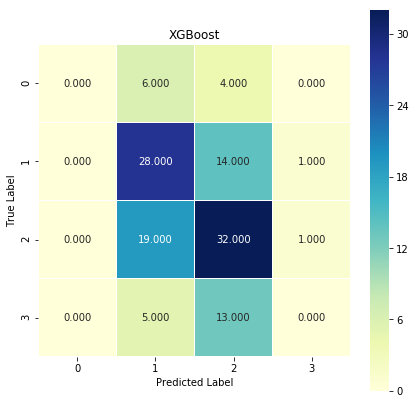

In [58]:
cm_xgbsm = confusion_matrix(y_test, pred_test_xgb)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')